# 資料前處理 DataPreprocessing

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded=files.upload() #importdata.csv

Saving importdata.csv to importdata.csv


In [2]:
df = pd.read_csv('importdata.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


觀察欄位/資料清洗(我這裡放的importdata.csv已經有先填補過空值了，我是用excel的亂數表以各類別出現的機率來補。

In [3]:
df.columns 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotFrontage    1460 non-null   int64 
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   Alley          91 non-null     object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64 
 17  OverallCond    1460 non-null   int64 
 18  YearBuilt      1460 non-null

In [5]:
#觀察資料發現Alley,FireplaceQu,PoolQC,Fence,MiscFeature欄位缺失太多
df.drop("Alley",inplace = True,axis=1) #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df.drop("FireplaceQu",inplace = True,axis=1)  #inplace = True會直接把原本的data改掉，axis=1才會刪除 行
df.drop("PoolQC",inplace = True,axis=1)
df.drop("Fence",inplace = True,axis=1)
df.drop("MiscFeature",inplace = True,axis=1)

df.head(10) #.head()可以查看前幾筆資料，括號填入數字

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,Attchd,1993,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Attchd,2004,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,75,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,Attchd,1973,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,Detchd,1931,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,1077,1,0,1,0,2,2,TA,5,Typ,2,Attchd,1939,RFn,1,205,Gd,TA,Y,0,4,0,0,0,0,0,1,2008,WD,Normal,118000


In [6]:
df[['LotShape','LandContour','LandSlope','ExterQual','ExterCond','HeatingQC','KitchenQual']].head()

,LotShape,LandContour,LandSlope,ExterQual,ExterCond,HeatingQC,KitchenQual
0,Reg,Lvl,Gtl,Gd,TA,Ex,Gd
1,Reg,Lvl,Gtl,TA,TA,Ex,TA
2,IR1,Lvl,Gtl,Gd,TA,Ex,Gd
3,IR1,Lvl,Gtl,TA,TA,Gd,Gd
4,IR1,Lvl,Gtl,Gd,TA,Ex,Gd


### Labelcoding:


In [7]:
#這些是我觀察是連續類別資料所以選擇Labelcoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_le=pd.DataFrame(df)

LotShape_mapping = {
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    '0':0
}
data_le['LotShape_le'] = data_le['LotShape'].map(LotShape_mapping)
#data_le['LotShape_le'] = labelencoder.fit_transform(data_le['LotShape'])

LandContour_mapping = {
    'Lvl':4,
    'Bnk':3,
    'HLS':2,
    'Low':1,
    '0':0
}
data_le['LandContour_le'] = data_le['LandContour'].map(LandContour_mapping)
#data_le['LandContour_le'] = labelencoder.fit_transform(data_le['LandContour'])
  
LandSlope_mapping = {
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    '0':0
}
data_le['LandSlope_le'] = data_le['LandSlope'].map(LandSlope_mapping)
#data_le['LandSlope_le'] = labelencoder.fit_transform(data_le['LandSlope'])

ExterQual_mapping = {
    'Ex':4,
    'Gd':3,
    'TA':2,
    'Fa':1,
    '0':0
}
data_le['ExterQual_le'] = data_le['ExterQual'].map(ExterQual_mapping)
#data_le['ExterQual_le'] = labelencoder.fit_transform(data_le['ExterQual'])

ExterCond_mapping = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    '0':0
}
data_le['ExterCond_le'] = data_le['ExterCond'].map(ExterCond_mapping)
#data_le['ExterCond_le'] = labelencoder.fit_transform(data_le['ExterCond'])

HeatingQC_mapping = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    '0':0
}
data_le['HeatingQC_le'] = data_le['HeatingQC'].map(HeatingQC_mapping)
#data_le['HeatingQC_le'] = labelencoder.fit_transform(data_le['HeatingQC'])

KitchenQual_mapping = {
    'Ex':5,
    'Gd':4,
    'TA':3,
    'Fa':2,
    'Po':1,
    '0':0
}
data_le['KitchenQual_le'] = data_le['KitchenQual'].map(KitchenQual_mapping)
#data_le['KitchenQual_le'] = labelencoder.fit_transform(data_le['KitchenQual'])

#data_le['Exterior2nd_le'] = labelencoder.fit_transform(data_le['Exterior2nd'])

data_le

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_le,LandContour_le,LandSlope_le,ExterQual_le,ExterCond_le,HeatingQC_le,KitchenQual_le
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,...,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4,4,3,3,3,5,4
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,...,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4,4,3,2,3,5,3
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,...,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3,4,3,3,3,5,4
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,...,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,3,4,3,2,3,4,4
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,...,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3,4,3,3,3,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,...,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,4,4,3,2,3,5,3
1456,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,...,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,4,4,3,2,3,3,3
1457,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,...,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,4,4,3,4,4,5,4
1458,20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,...,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,4,4,3,2,3,4,4


In [8]:
data_le['Id'] = np.array(range(len(data_le)) )+1
data_le

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_le,LandContour_le,LandSlope_le,ExterQual_le,ExterCond_le,HeatingQC_le,KitchenQual_le,Id
0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4,4,3,3,3,5,4,1
1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4,4,3,2,3,5,3,2
2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3,4,3,3,3,5,4,3
3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,3,4,3,2,3,4,4,4
4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3,4,3,3,3,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,...,0,1647,0,0,2,1,3,1,TA,7,Typ,1,Attchd,1999,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000,4,4,3,2,3,5,3,1456
1456,20,RL,85,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,...,0,2073,1,0,2,0,3,1,TA,7,Min1,2,Attchd,1978,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000,4,4,3,2,3,3,3,1457
1457,70,RL,66,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,...,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500,4,4,3,4,4,5,4,1458
1458,20,RL,68,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,...,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125,4,4,3,2,3,4,4,1459


In [9]:
from google.colab import files
data_le.to_csv('Label2.csv')

files.download('Label2.csv')
#這裡我把完成LabelCoding的csv先下載

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
from google.colab import files
uploaded=files.upload()#label2.csv

Saving Label2.csv to Label2 (1).csv


In [11]:
df2 = pd.read_csv('Label2.csv')
df2.head()

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_le,LandContour_le,LandSlope_le,ExterQual_le,ExterCond_le,HeatingQC_le,KitchenQual_le,Id
0,0,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,...,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4,4,3,3,3,5,4,1
1,1,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,...,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4,4,3,2,3,5,3,2
2,2,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,...,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3,4,3,3,3,5,4,3
3,3,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,...,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,3,4,3,2,3,4,4,4
4,4,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,...,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3,4,3,3,3,5,4,5


In [12]:
df2.drop("LotShape",inplace = True,axis=1) 
df2.drop("LandContour",inplace = True,axis=1)  
df2.drop("LandSlope",inplace = True,axis=1)
#df2.drop("Exterior2nd",inplace = True,axis=1)
df2.drop("ExterQual",inplace = True,axis=1)
df2.drop("ExterCond",inplace = True,axis=1)
df2.drop("HeatingQC",inplace = True,axis=1)
df2.drop("KitchenQual",inplace = True,axis=1)
df2.head()#我想把已經編碼的欄位先drop掉

,Unnamed: 0,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotShape_le,LandContour_le,LandSlope_le,ExterQual_le,ExterCond_le,HeatingQC_le,KitchenQual_le,Id
0,0,60,RL,65,8450,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,8,Typ,0,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,4,4,3,3,3,5,4,1
1,1,20,RL,80,9600,Pave,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,6,Typ,1,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,4,4,3,2,3,5,3,2
2,2,60,RL,68,11250,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,6,Typ,1,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,3,4,3,3,3,5,4,3
3,3,70,RL,60,9550,Pave,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,7,Typ,1,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,3,4,3,2,3,4,4,4
4,4,60,RL,84,14260,Pave,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,9,Typ,1,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,3,4,3,3,3,5,4,5


### One Hot Coding

開始把剩下的類別非連續One Hot Coding

In [13]:
#把'MSSubClass'特徵轉成object
df2['MSSubClass'] = df2['MSSubClass'].astype(object)

obj_df2 = df2.select_dtypes(include=['object']).copy()
obj_df2 = obj_df2[['MSSubClass','MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
           'BldgType','HouseStyle','RoofMatl','RoofStyle','Exterior1st',
           'Exterior2nd',
           'MasVnrType','RoofMatl',
           'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
           'Electrical','CentralAir','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
           'PavedDrive','SaleType','SaleCondition'
          ]]
obj_df2.head()

,MSSubClass,MSZoning,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofMatl,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,RoofMatl,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,CentralAir,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,CompShg,Gable,VinylSd,VinylSd,BrkFace,CompShg,PConc,Gd,TA,No,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,CompShg,Gable,MetalSd,MetalSd,None,CompShg,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,CompShg,Gable,VinylSd,VinylSd,BrkFace,CompShg,PConc,Gd,TA,Mn,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,CompShg,Gable,Wd Sdng,Wd Shng,None,CompShg,BrkTil,TA,Gd,No,ALQ,Unf,GasA,SBrkr,Y,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,CompShg,Gable,VinylSd,VinylSd,BrkFace,CompShg,PConc,Gd,TA,Av,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [14]:
obj_df2.dtypes

MSSubClass       object
MSZoning         object
Street           object
Utilities        object
LotConfig        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofMatl         object
RoofStyle        object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
RoofMatl         object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
Electrical       object
CentralAir       object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [15]:
obj_df2[obj_df2.isnull().any(axis=1)]

,MSSubClass,MSZoning,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofMatl,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,RoofMatl,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,CentralAir,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
17,90,RL,Pave,AllPub,Inside,Sawyer,Norm,Norm,Duplex,1Story,CompShg,Gable,MetalSd,MetalSd,None,CompShg,Slab,NaN,NaN,NaN,NaN,NaN,GasA,SBrkr,Y,Typ,CarPort,Unf,TA,TA,Y,WD,Normal
39,90,RL,Pave,AllPub,Inside,Edwards,Norm,Norm,Duplex,1Story,CompShg,Gable,AsbShng,Plywood,None,CompShg,PConc,NaN,NaN,NaN,NaN,NaN,GasA,FuseP,N,Typ,NaN,NaN,NaN,NaN,N,WD,AdjLand
48,190,RM,Pave,AllPub,Inside,OldTown,Norm,Norm,2fmCon,2Story,CompShg,Gable,MetalSd,MetalSd,None,CompShg,BrkTil,TA,TA,No,Unf,Unf,GasA,SBrkr,Y,Typ,NaN,NaN,NaN,NaN,N,New,Partial
78,90,RL,Pave,AllPub,Inside,Sawyer,Norm,Norm,Duplex,1Story,CompShg,Hip,HdBoard,HdBoard,None,CompShg,CBlock,TA,TA,No,Unf,Unf,GasA,SBrkr,N,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
88,50,C (all),Pave,AllPub,Corner,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,CompShg,Hip,Plywood,Plywood,None,CompShg,CBlock,TA,Fa,No,Unf,Unf,GasA,SBrkr,N,Typ,NaN,NaN,NaN,NaN,N,ConLD,Abnorml
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,20,RL,Pave,AllPub,Corner,Mitchel,Norm,Norm,1Fam,1Story,CompShg,Gable,HdBoard,Plywood,None,CompShg,CBlock,TA,TA,No,ALQ,Unf,GasA,SBrkr,Y,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal
1412,90,RL,Pave,AllPub,Inside,NAmes,Norm,Norm,Duplex,1Story,CompShg,Gable,BrkFace,Stone,None,CompShg,Slab,NaN,NaN,NaN,NaN,NaN,Wall,FuseF,N,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
1449,180,RM,Pave,AllPub,Inside,MeadowV,Norm,Norm,Twnhs,SFoyer,CompShg,Gable,CemntBd,CmentBd,None,CompShg,CBlock,Gd,TA,Av,GLQ,Unf,GasA,SBrkr,Y,Typ,NaN,NaN,NaN,NaN,Y,WD,Abnorml
1450,90,RL,Pave,AllPub,FR2,NAmes,Norm,Norm,Duplex,2Story,CompShg,Gable,VinylSd,VinylSd,None,CompShg,CBlock,Gd,TA,No,Unf,Unf,GasA,SBrkr,Y,Typ,NaN,NaN,NaN,NaN,Y,WD,Normal


In [16]:
b = obj_df2[['MSSubClass','MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1','Condition2',
        'BldgType','HouseStyle','RoofMatl','RoofStyle','Exterior1st',
        'Exterior2nd',
        'MasVnrType','RoofMatl',
        'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
        'Electrical','CentralAir','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
        'PavedDrive','SaleType','SaleCondition'
      ]]
b

,MSSubClass,MSZoning,Street,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofMatl,RoofMatl,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,RoofMatl,RoofMatl,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,Electrical,CentralAir,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,CompShg,CompShg,Gable,VinylSd,VinylSd,BrkFace,CompShg,CompShg,PConc,Gd,TA,No,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,20,RL,Pave,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,CompShg,CompShg,Gable,MetalSd,MetalSd,None,CompShg,CompShg,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,60,RL,Pave,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,CompShg,CompShg,Gable,VinylSd,VinylSd,BrkFace,CompShg,CompShg,PConc,Gd,TA,Mn,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,70,RL,Pave,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,CompShg,CompShg,Gable,Wd Sdng,Wd Shng,None,CompShg,CompShg,BrkTil,TA,Gd,No,ALQ,Unf,GasA,SBrkr,Y,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,60,RL,Pave,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,CompShg,CompShg,Gable,VinylSd,VinylSd,BrkFace,CompShg,CompShg,PConc,Gd,TA,Av,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,AllPub,Inside,Gilbert,Norm,Norm,1Fam,2Story,CompShg,CompShg,Gable,VinylSd,VinylSd,None,CompShg,CompShg,PConc,Gd,TA,No,Unf,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,20,RL,Pave,AllPub,Inside,NWAmes,Norm,Norm,1Fam,1Story,CompShg,CompShg,Gable,Plywood,Plywood,Stone,CompShg,CompShg,CBlock,Gd,TA,No,ALQ,Rec,GasA,SBrkr,Y,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,70,RL,Pave,AllPub,Inside,Crawfor,Norm,Norm,1Fam,2Story,CompShg,CompShg,Gable,CemntBd,CmentBd,None,CompShg,CompShg,Stone,TA,Gd,No,GLQ,Unf,GasA,SBrkr,Y,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,20,RL,Pave,AllPub,Inside,NAmes,Norm,Norm,1Fam,1Story,CompShg,CompShg,Hip,MetalSd,MetalSd,None,CompShg,CompShg,CBlock,TA,TA,Mn,GLQ,Rec,GasA,FuseA,Y,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [21]:
data_ohc = pd.get_dummies(b, columns=['MSSubClass','MSZoning','Street','Utilities','LotConfig','Neighborhood','Condition1'
                     ,'Condition2','BldgType','HouseStyle','RoofMatl','RoofStyle','Exterior1st','Exterior2nd','MasVnrType'
                     ,'RoofMatl','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating',
                     'Electrical','CentralAir','Functional','GarageType','GarageFinish','GarageQual','GarageCond',
                     'PavedDrive','SaleType','SaleCondition'
                    ])

data_ohc['Id'] = np.array(range(len(data_ohc)) )+1
data_ohc

,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,...,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,2
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,3
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,4
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1456
1456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1457
1457,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1458
1458,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1459


In [22]:
from google.colab import files
data_ohc.to_csv('ohc.csv')

files.download('ohc.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

多了276個欄位

得到OHC跟LC之後我怕錯誤所以直接用excel處理
把它們合併並且把處理完的欄位drop掉
這樣剩下就是全編碼的data了

In [23]:
from google.colab import files
uploaded=files.upload()#lenohe.csv

Saving lenohe.csv to lenohe.csv


In [24]:
df3 = pd.read_csv('lenohe.csv')
df3.head()#確認一下是不是全部都是數字

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Unnamed: 36,LotShape_le,LandContour_le,LandSlope_le,...,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,60,65,8450,7,5,2003,2003,196,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003,2,548,0,61,0,0,0,0,0,2,2008,NaN,4,4,3,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,208500
1,20,80,9600,6,8,1976,1976,0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976,2,460,298,0,0,0,0,0,0,5,2007,NaN,4,4,3,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,181500
2,60,68,11250,7,5,2001,2002,162,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001,2,608,0,42,0,0,0,0,0,9,2008,NaN,3,4,3,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,223500
3,70,60,9550,7,5,1915,1970,0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998,3,642,0,35,272,0,0,0,0,2,2006,NaN,3,4,3,...,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,140000
4,60,84,14260,8,5,2000,2000,350,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000,3,836,192,84,0,0,0,0,0,12,2008,NaN,3,4,3,...,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,250000


### 特徵工程(Feature Engineering)

看相關係數做特徵工程(Feature Engineering)
篩選掉不重要的欄位

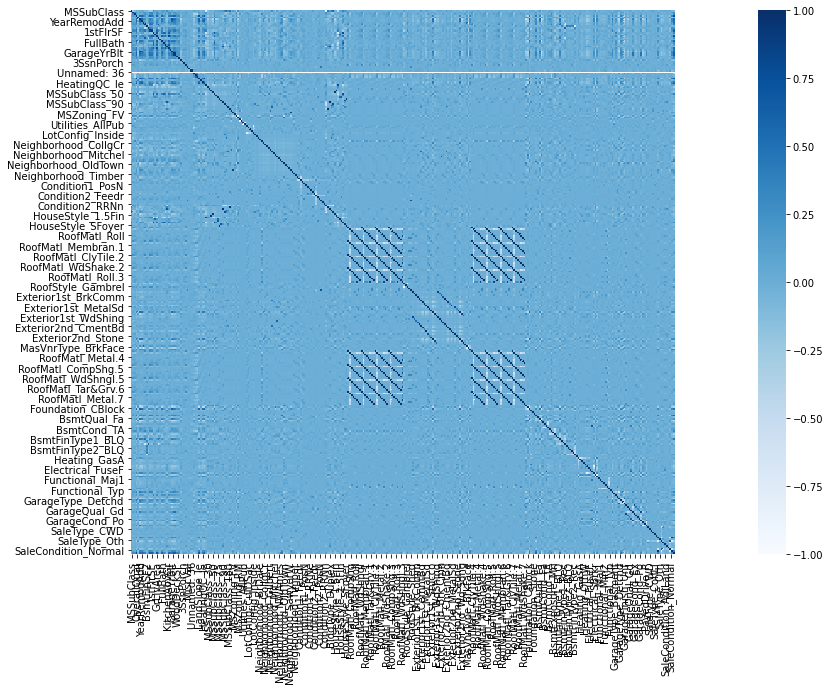

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
# correlation matrix
cormat = df3.corr()#計算相關係數
plt.subplots(figsize=(30, 10))# 設置長寬尺寸大小
sns.heatmap(cormat, vmax=1, square=True, cmap="Blues")#annot=True這裡還可以放annot就是會有相關係數的數字在上面


In [34]:
high_corr = cormat.index[abs(cormat["SalePrice"])>0.3]
#abs是取絕對值的意思
#abs(trian_corr["SalePrice"])>0.6 這句的意思是與SalePrice有關的係數>0.5的判別式，它會輸出True(大於0.6)或是False
#abs(trian_corr["SalePrice"])>0.6 會丟回一堆True和False，放在原本的trian_corr.index[]就會把是大於0.6的傳回去
print(high_corr) 
print(cormat.shape)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'ExterQual_le', 'HeatingQC_le',
       'KitchenQual_le', 'MSSubClass_60', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_CBlock',
       'Foundation_PConc', 'BsmtQual_Ex', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType1_GLQ', 'GarageType_Attchd', 'GarageType_Detchd',
       'GarageFinish_Fin', 'GarageFinish_Unf', 'SaleType_New',
       'SaleCondition_Partial', 'SalePrice'],
      dtype='object')
(321, 321)


In [35]:
for i in df3.columns: #找原本資料中所有columns
    if i not in high_corr: #如果沒有相關係數大於0.5的話
        df3 = df3.drop(i,axis=1) #就drop掉
print(df3) #剩8個欄位

      OverallQual  TotalBsmtSF  ...  KitchenQual_le  SalePrice
0               7          856  ...               4     208500
1               6         1262  ...               3     181500
2               7          920  ...               4     223500
3               7          756  ...               4     140000
4               8         1145  ...               4     250000
...           ...          ...  ...             ...        ...
1455            6          953  ...               3     175000
1456            6         1542  ...               3     210000
1457            7         1152  ...               4     266500
1458            5         1078  ...               4     142125
1459            5         1256  ...               3     147500

[1460 rows x 9 columns]


In [36]:
df3.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,ExterQual_le,KitchenQual_le,SalePrice
0,7,856,856,1710,2,548,3,4,208500
1,6,1262,1262,1262,2,460,2,3,181500
2,7,920,920,1786,2,608,3,4,223500
3,7,756,961,1717,3,642,2,4,140000
4,8,1145,1145,2198,3,836,3,4,250000


In [37]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   OverallQual     1460 non-null   int64
 1   TotalBsmtSF     1460 non-null   int64
 2   1stFlrSF        1460 non-null   int64
 3   GrLivArea       1460 non-null   int64
 4   GarageCars      1460 non-null   int64
 5   GarageArea      1460 non-null   int64
 6   ExterQual_le    1460 non-null   int64
 7   KitchenQual_le  1460 non-null   int64
 8   SalePrice       1460 non-null   int64
dtypes: int64(9)
memory usage: 102.8 KB


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from sklearn.neural_network import MLPRegressor

# **資料編碼（標準化）**

In [40]:
cols_to_norm = ['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea','GarageCars', 'GarageArea','ExterQual_le', 'KitchenQual_le', 'SalePrice']
df3[cols_to_norm] = df3[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min())*0.6+0.2)

In [42]:
df3.head()

,OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,GarageCars,GarageArea,ExterQual_le,KitchenQual_le,SalePrice
0,0.600000,0.284059,0.271868,0.355539,0.50,0.431876,0.6,0.6,0.344647
1,0.533333,0.323928,0.327765,0.304898,0.50,0.394640,0.4,0.4,0.322150
2,0.600000,0.290344,0.280679,0.364130,0.50,0.457264,0.6,0.6,0.357145
3,0.600000,0.274239,0.286324,0.356330,0.65,0.471650,0.4,0.6,0.287571
4,0.666667,0.312439,0.311657,0.410701,0.65,0.553738,0.6,0.6,0.379225


# **擷取分析資料欄位**

In [44]:
y=df3['SalePrice']

In [45]:
df3 =df3.drop(['SalePrice'],axis=1)

# **分割資料：訓練與測試**






In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df3, y,test_size=0.33, random_state=101)

In [48]:
X_train,y_train

(      OverallQual  TotalBsmtSF  ...  ExterQual_le  KitchenQual_le
 395      0.466667     0.312340  ...           0.4             0.4
 1213     0.400000     0.263633  ...           0.4             0.4
 612      0.666667     0.327561  ...           0.6             0.8
 665      0.666667     0.338069  ...           0.6             0.6
 37       0.466667     0.327365  ...           0.4             0.4
 ...           ...          ...  ...           ...             ...
 1417     0.666667     0.326088  ...           0.6             0.6
 75       0.400000     0.245368  ...           0.4             0.4
 599      0.533333     0.270311  ...           0.4             0.4
 1361     0.600000     0.350245  ...           0.6             0.6
 863      0.466667     0.312733  ...           0.4             0.4
 
 [978 rows x 8 columns], 395     0.278406
 1213    0.291737
 612     0.388807
 665     0.362977
 37      0.298403
           ...   
 1417    0.454215
 75      0.246744
 599     0.296737
 1361   

In [49]:
X_test,y_test

(      OverallQual  TotalBsmtSF  ...  ExterQual_le  KitchenQual_le
 1054     0.666667     0.304583  ...           0.6             0.6
 361      0.466667     0.286710  ...           0.4             0.4
 1282     0.466667     0.302128  ...           0.4             0.6
 161      0.733333     0.354370  ...           0.6             0.8
 515      0.800000     0.396989  ...           0.8             0.8
 ...           ...          ...  ...           ...             ...
 85       0.666667     0.326481  ...           0.6             0.6
 56       0.666667     0.295254  ...           0.6             0.6
 269      0.533333     0.312242  ...           0.4             0.4
 843      0.466667     0.376759  ...           0.4             0.4
 509      0.466667     0.302226  ...           0.4             0.4
 
 [482 rows x 8 columns], 1054    0.383391
 361     0.291737
 1282    0.296320
 161     0.514623
 515     0.506592
           ...   
 85      0.387557
 56      0.314651
 269     0.294237
 843    

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 978 entries, 395 to 863
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   OverallQual     978 non-null    float64
 1   TotalBsmtSF     978 non-null    float64
 2   1stFlrSF        978 non-null    float64
 3   GrLivArea       978 non-null    float64
 4   GarageCars      978 non-null    float64
 5   GarageArea      978 non-null    float64
 6   ExterQual_le    978 non-null    float64
 7   KitchenQual_le  978 non-null    float64
dtypes: float64(8)
memory usage: 68.8 KB


# NN

In [51]:
nn=MLPRegressor(hidden_layer_sizes=(10),  #預設值1層,數目100
         activation='logistic',  #{'identity'無，'logistic'為sigmoid，'tanh'，'relu'}，預設='relu'
         solver='sgd',   #{'lbfgs'牛頓，'sgd'隨機梯度，'adam'隨機梯度優化}，預設='adam'
         batch_size='auto',  #'auto'為min(200～樣本數)
         learning_rate='constant',  #constant固定'，'invscaling隨著時間遞減'，'adaptive誤差減少時不改變'}，預設 ='constant' 
         learning_rate_init=0.001, #優化器為sgd、adam使用
         power_t=0.5,     # 優化器為sgd，則可以設定強化學習率   
         max_iter=200,    #訓練次數
         shuffle=True,    #隨機設定權重
         random_state=1,   #隨機的基礎值
         momentum=0.9)

In [52]:
nn.fit(X_train, y_train)
y_pred=nn.predict(X_train)

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.0033421811105617196
RMSE= 0.057811600138395404
MAE= 0.04113678172759923
R2: 0.2502838952329711


測試結果

In [54]:
y_pred=nn.predict(X_test)
y_pred

array([0.33114806, 0.3144159 , 0.31888576, 0.34581002, 0.34591924,
       0.31162768, 0.30738806, 0.31979786, 0.31704188, 0.32100509,
       0.31897086, 0.32491165, 0.32298015, 0.31936654, 0.32135478,
       0.32269358, 0.32166261, 0.31065295, 0.31454077, 0.33074691,
       0.32209387, 0.29676719, 0.32731747, 0.32197303, 0.32679999,
       0.32146209, 0.30856357, 0.32702343, 0.32301907, 0.31165051,
       0.32644641, 0.32543794, 0.32063089, 0.32946015, 0.28988537,
       0.3153008 , 0.35182093, 0.32705883, 0.30234607, 0.29909878,
       0.33320938, 0.32567919, 0.32836361, 0.32236979, 0.3257332 ,
       0.3267442 , 0.33461952, 0.32507511, 0.32039311, 0.32320468,
       0.33779262, 0.33749248, 0.31128828, 0.32410684, 0.32435461,
       0.3131041 , 0.32970451, 0.32770584, 0.31924007, 0.32693943,
       0.33245596, 0.31999236, 0.3116943 , 0.31511465, 0.29899316,
       0.32709518, 0.30477651, 0.32709939, 0.32802736, 0.32376265,
       0.32764297, 0.32188917, 0.32395435, 0.32337381, 0.31352

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


MSE= 0.003198459585489624
RMSE= 0.05655492538665067
MAE= 0.041064882447274666
R2: 0.2411582178943874


In [56]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

array([1.36265881e-01, 7.77365151e-02, 7.61535056e-02, 3.28032287e-01,
       3.17163473e-01, 1.75623918e-01, 8.14448910e-02, 9.88458234e-02,
       8.59623150e-02, 1.32672328e-01, 2.09982160e-01, 1.29847787e-01,
       1.60105781e-01, 2.31152562e-02, 5.91705271e-02, 6.65120474e-02,
       1.91018319e-01, 1.22547108e-01, 6.92384021e-03, 5.92906977e-02,
       7.33978040e-02, 4.83835961e-01, 2.21218926e-02, 8.96361308e-02,
       1.34439182e-01, 5.66224571e-02, 1.20055589e-01, 8.23125769e-02,
       4.62667873e-02, 2.54581476e-01, 5.28081921e-02, 4.53557975e-02,
       1.49740963e-02, 2.01412898e-01, 4.23335991e-01, 2.01185619e-01,
       2.86006669e-01, 3.11211672e-02, 8.61531784e-02, 2.04053173e-01,
       1.54769363e-01, 1.57731001e-02, 8.05870066e-02, 1.46086946e-02,
       2.50455675e-01, 5.66216067e-02, 2.10399062e-01, 3.51858982e-02,
       2.08691748e-01, 2.92423887e-01, 2.31742271e-01, 9.81581714e-02,
       1.14773677e-01, 2.86906641e-02, 2.94770720e-02, 1.04793538e-01,
      

In [57]:
for i in range(len(errvalue)):
  if errvalue[i]<0.01:            #門檻值
    count=count+1
count

26

# DNN

In [104]:
dnn=MLPRegressor(hidden_layer_sizes=(5,5,5),  #預設值1層,數目100
         activation='relu',  #{'identity'無，'logistic'為sigmoid，'tanh'，'relu'}，預設='relu'
         solver='adam',   #{'lbfgs'牛頓，'sgd'隨機梯度，'adam'隨機梯度優化}，預設='adam'
         batch_size='auto',  #'auto'為min(200～樣本數)
         learning_rate='adaptive',  #constant固定'，'invscaling隨著時間遞減'，'adaptive誤差減少時不改變'}，預設 ='constant' 
         learning_rate_init=0.01, #優化器為sgd、adam使用
         power_t=0.5,     # 優化器為sgd，則可以設定強化學習率   
         max_iter=2000,    #訓練次數
         shuffle=True,    #隨機設定權重
         random_state=1,   #隨機的基礎值
         momentum=0.9)

In [105]:
dnn.fit(X_train, y_train)
y_pred=dnn.predict(X_train)

In [106]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.0017173552768585418
RMSE= 0.04144098547161423
MAE= 0.029008083831088247
R2: 0.6147638724308708


In [107]:
y_pred=dnn.predict(X_test)
y_pred

array([0.36196679, 0.27628725, 0.33077173, 0.44426009, 0.44946738,
       0.2723065 , 0.25279099, 0.35799615, 0.28583801, 0.30578627,
       0.26694312, 0.31519963, 0.23803981, 0.30646862, 0.31866703,
       0.33275654, 0.26613557, 0.26035063, 0.31378844, 0.36961132,
       0.30716651, 0.2360768 , 0.34828229, 0.30922602, 0.36350445,
       0.31484652, 0.29639288, 0.30932672, 0.37165979, 0.30730404,
       0.35155497, 0.30705687, 0.35904352, 0.38041301, 0.16145394,
       0.30580345, 0.44242531, 0.35939949, 0.24326557, 0.27686904,
       0.34799209, 0.30677787, 0.34372234, 0.31331163, 0.2552449 ,
       0.25959648, 0.40144691, 0.36792383, 0.28923793, 0.27359155,
       0.30704185, 0.32564454, 0.24860726, 0.3610448 , 0.3412502 ,
       0.25980321, 0.31412938, 0.36143867, 0.30426101, 0.38287586,
       0.30520329, 0.3579125 , 0.29666132, 0.31121475, 0.24995532,
       0.30847481, 0.24606255, 0.35952298, 0.29396196, 0.37975204,
       0.29828911, 0.27487374, 0.36082711, 0.32268866, 0.23071

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)

MSE= 0.0019521322908675758
RMSE= 0.04418294117493284
MAE= 0.0310483474342515
R2: 0.5368521918399994


In [109]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-y_pred)/ytest)
errvalue

array([0.05588131, 0.05295864, 0.11626545, 0.13672706, 0.11276184,
       0.02728368, 0.11063713, 0.23009759, 0.02092017, 0.07897241,
       0.01262044, 0.09607521, 0.14498969, 0.01820423, 0.05031184,
       0.09977044, 0.01458131, 0.05922074, 0.00929914, 0.05124733,
       0.02365144, 0.18038398, 0.08758925, 0.04649713, 0.03722395,
       0.03487757, 0.07587718, 0.02374378, 0.2038153 , 0.23708428,
       0.02004486, 0.01368697, 0.13657131, 0.07790694, 0.20726179,
       0.16500403, 0.1021321 , 0.06468477, 0.12608862, 0.11456505,
       0.11727101, 0.07289432, 0.03758278, 0.04229687, 0.02014153,
       0.16051992, 0.05270664, 0.17163556, 0.09115796, 0.09403194,
       0.11961127, 0.12981804, 0.1096972 , 0.14592895, 0.0831024 ,
       0.08327964, 0.06457462, 0.02035435, 0.06159692, 0.0683079 ,
       0.07298428, 0.21847954, 0.0168784 , 0.27855856, 0.05406336,
       0.03621699, 0.00231723, 0.02847306, 0.02844682, 0.18370464,
       0.07166571, 0.0229214 , 0.05075867, 0.07987779, 0.13775

In [110]:
for i in range(len(errvalue)):
  if errvalue[i]<0.01:            #門檻值
    count=count+1
count

28

# SVR


## **模式執行與評估**

In [75]:
from sklearn import svm
svr = svm.SVR()

In [76]:
svr.fit(X_train, y_train)
y_pred=svr.predict(X_train)

In [77]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.001594963841844218
RMSE= 0.03993699840804536
MAE= 0.03210873340918059
R2: 0.6422186472860743


## **測試結果**

In [78]:
y_pred=svr.predict(X_test)
y_pred

array([0.34268424, 0.3128051 , 0.30221069, 0.55175781, 0.55261691,
       0.31068405, 0.31670528, 0.2890423 , 0.32351516, 0.30553489,
       0.31071988, 0.3172108 , 0.33674902, 0.33186828, 0.30049891,
       0.29782155, 0.33217974, 0.30909394, 0.32438611, 0.38170396,
       0.30745444, 0.30432486, 0.33578941, 0.30945808, 0.32090499,
       0.3097902 , 0.31890887, 0.3204484 , 0.30933969, 0.31902352,
       0.30579881, 0.31353249, 0.30228011, 0.37122387, 0.32377181,
       0.315628  , 0.57137577, 0.31750096, 0.30974494, 0.31276667,
       0.35103391, 0.31252322, 0.30941249, 0.31154874, 0.33179109,
       0.30691002, 0.44471072, 0.32607957, 0.30693362, 0.32438158,
       0.32191412, 0.37244046, 0.32985544, 0.3036038 , 0.29959974,
       0.31244005, 0.33326023, 0.3406089 , 0.33088885, 0.34883975,
       0.34046441, 0.2894458 , 0.31555029, 0.31044872, 0.31052882,
       0.31621535, 0.32827047, 0.32003662, 0.31343521, 0.31857138,
       0.31637768, 0.30505597, 0.31874987, 0.31657701, 0.32370

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


MSE= 0.0018324978264020147
RMSE= 0.04280768419807377
MAE= 0.03307833285788564
R2: 0.565235739541572


In [80]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errth=abs(ytest-y_pred)
errth

array([4.07069518e-02, 2.10678380e-02, 5.89073282e-03, 3.71348459e-02,
       4.60253266e-02, 4.56097541e-02, 3.24669767e-02, 1.98838584e-03,
       3.15696009e-02, 2.21298114e-02, 4.71037163e-02, 2.96396287e-02,
       5.83432450e-02, 1.97171868e-02, 2.90339797e-03, 4.74753810e-03,
       6.21061384e-02, 3.23545936e-02, 7.65232240e-03, 3.01108450e-02,
       7.38500559e-03, 1.04324861e-01, 1.55561081e-02, 1.39713384e-02,
       5.66536826e-02, 5.55467795e-03, 4.34193541e-02, 1.82959164e-02,
       6.04793876e-04, 7.06135773e-02, 3.88477686e-02, 2.21462163e-03,
       1.36204588e-02, 4.13299446e-02, 1.20105656e-01, 5.31366792e-02,
       7.86247611e-02, 2.00632708e-02, 3.13808199e-02, 6.43567314e-02,
       4.31891129e-02, 1.83752689e-02, 4.77323507e-02, 1.56002625e-02,
       7.12994891e-02, 2.32480637e-03, 2.09276368e-02, 1.20537444e-02,
       4.18593259e-02, 7.43052043e-02, 4.76744267e-02, 1.78534187e-03,
       5.06164483e-02, 1.14635470e-02, 1.54676080e-02, 2.90349677e-02,
      

In [81]:
for i in range(len(errth)):
  if errth[i]<0.01:
    count=count+1
count

92

In [82]:
for i in range(len(errth)):
  if errth[i]<0.01:
    count=count+1
count

184

# Nearest Neighbors regression

## **模式執行與評估**

In [83]:
from sklearn import neighbors
import numpy as np
n_neighbors = 5
for i, weights in enumerate(['uniform', 'distance']):
    knnr = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)

In [84]:
knnr.fit(X_train, y_train)
y_pred=knnr.predict(X_train)

In [85]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 7.231434374350617e-07
RMSE= 0.0008503784083777419
MAE= 0.00011134984944433703
R2: 0.9998377848886201


## **測試結果**

In [86]:
y_pred=knnr.predict(X_test)
y_pred

array([0.3836363 , 0.27267266, 0.29548733, 0.49141122, 0.51794035,
       0.27342791, 0.28461575, 0.3014403 , 0.29535027, 0.2985423 ,
       0.25174281, 0.30822942, 0.27407598, 0.30226804, 0.29942457,
       0.30833013, 0.2974348 , 0.25717587, 0.27799188, 0.36551035,
       0.29287124, 0.24746553, 0.32821929, 0.30401471, 0.33987854,
       0.28775817, 0.279087  , 0.30147332, 0.32721389, 0.27684333,
       0.34511708, 0.30160253, 0.31426688, 0.39820848, 0.22623063,
       0.25211712, 0.57918202, 0.34457126, 0.26027029, 0.25885126,
       0.38081446, 0.31783207, 0.35643298, 0.30882451, 0.28250686,
       0.27652333, 0.39137918, 0.33475204, 0.29040618, 0.2726567 ,
       0.28582656, 0.3528924 , 0.27660132, 0.30819331, 0.32606783,
       0.2764913 , 0.3003117 , 0.3579258 , 0.30385898, 0.36001841,
       0.31100055, 0.30192592, 0.27986815, 0.28273689, 0.25672197,
       0.31670505, 0.2589092 , 0.34521865, 0.29460674, 0.33562827,
       0.28749979, 0.28368362, 0.32607735, 0.30601962, 0.27525

In [87]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)

MSE= 0.0009948389466468573
RMSE= 0.03154106762059359
MAE= 0.019402530140002337
R2: 0.7639722063063032


In [88]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errth=abs(ytest-y_pred)
errth

array([2.45101877e-04, 1.90645947e-02, 8.32628287e-04, 2.32117460e-02,
       1.13487649e-02, 8.35361735e-03, 3.77453708e-04, 1.04096127e-02,
       3.40471004e-03, 1.51372201e-02, 1.18733509e-02, 2.06582474e-02,
       4.32980150e-03, 9.88305123e-03, 3.97773187e-03, 5.76104134e-03,
       2.73611971e-02, 1.95634678e-02, 3.87419030e-02, 1.39172363e-02,
       7.19819353e-03, 4.74655335e-02, 7.98598819e-03, 8.52796888e-03,
       3.76801358e-02, 1.64773490e-02, 3.59747983e-03, 6.79154893e-04,
       1.84789937e-02, 2.84333845e-02, 4.70505323e-04, 9.71534200e-03,
       1.63369357e-03, 1.43453367e-02, 2.25644740e-02, 1.03742023e-02,
       8.64310105e-02, 7.00702818e-03, 1.80938303e-02, 1.04413124e-02,
       1.34085665e-02, 1.30664153e-02, 7.11860069e-04, 1.83244935e-02,
       2.20152577e-02, 3.27114937e-02, 3.24039082e-02, 2.07262119e-02,
       2.53318798e-02, 2.25803222e-02, 1.15868677e-02, 2.13334038e-02,
       2.63767439e-03, 6.87404527e-03, 1.10004748e-02, 6.91377765e-03,
      

In [89]:
for i in range(len(errth)):
  if errth[i]<0.01:
    count=count+1
count

202

# Bayesian Regression




In [90]:
from sklearn import linear_model
from sklearn.linear_model import BayesianRidge, LinearRegression

bayr = linear_model.BayesianRidge()

## **模式執行與評估**

In [91]:
bayr.fit(X_train, y_train)
y_pred=bayr.predict(X_train)

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.0008482739998301221
RMSE= 0.02912514377355281
MAE= 0.01949988477890923
R2: 0.8097156743187685


## **測試結果**

In [93]:
y_pred=knnr.predict(X_test)
y_pred

array([0.3836363 , 0.27267266, 0.29548733, 0.49141122, 0.51794035,
       0.27342791, 0.28461575, 0.3014403 , 0.29535027, 0.2985423 ,
       0.25174281, 0.30822942, 0.27407598, 0.30226804, 0.29942457,
       0.30833013, 0.2974348 , 0.25717587, 0.27799188, 0.36551035,
       0.29287124, 0.24746553, 0.32821929, 0.30401471, 0.33987854,
       0.28775817, 0.279087  , 0.30147332, 0.32721389, 0.27684333,
       0.34511708, 0.30160253, 0.31426688, 0.39820848, 0.22623063,
       0.25211712, 0.57918202, 0.34457126, 0.26027029, 0.25885126,
       0.38081446, 0.31783207, 0.35643298, 0.30882451, 0.28250686,
       0.27652333, 0.39137918, 0.33475204, 0.29040618, 0.2726567 ,
       0.28582656, 0.3528924 , 0.27660132, 0.30819331, 0.32606783,
       0.2764913 , 0.3003117 , 0.3579258 , 0.30385898, 0.36001841,
       0.31100055, 0.30192592, 0.27986815, 0.28273689, 0.25672197,
       0.31670505, 0.2589092 , 0.34521865, 0.29460674, 0.33562827,
       0.28749979, 0.28368362, 0.32607735, 0.30601962, 0.27525

In [94]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)

MSE= 0.0009948389466468573
RMSE= 0.03154106762059359
MAE= 0.019402530140002337
R2: 0.7639722063063032


In [95]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errth=abs(ytest-y_pred)
errth

array([2.45101877e-04, 1.90645947e-02, 8.32628287e-04, 2.32117460e-02,
       1.13487649e-02, 8.35361735e-03, 3.77453708e-04, 1.04096127e-02,
       3.40471004e-03, 1.51372201e-02, 1.18733509e-02, 2.06582474e-02,
       4.32980150e-03, 9.88305123e-03, 3.97773187e-03, 5.76104134e-03,
       2.73611971e-02, 1.95634678e-02, 3.87419030e-02, 1.39172363e-02,
       7.19819353e-03, 4.74655335e-02, 7.98598819e-03, 8.52796888e-03,
       3.76801358e-02, 1.64773490e-02, 3.59747983e-03, 6.79154893e-04,
       1.84789937e-02, 2.84333845e-02, 4.70505323e-04, 9.71534200e-03,
       1.63369357e-03, 1.43453367e-02, 2.25644740e-02, 1.03742023e-02,
       8.64310105e-02, 7.00702818e-03, 1.80938303e-02, 1.04413124e-02,
       1.34085665e-02, 1.30664153e-02, 7.11860069e-04, 1.83244935e-02,
       2.20152577e-02, 3.27114937e-02, 3.24039082e-02, 2.07262119e-02,
       2.53318798e-02, 2.25803222e-02, 1.15868677e-02, 2.13334038e-02,
       2.63767439e-03, 6.87404527e-03, 1.10004748e-02, 6.91377765e-03,
      

# **Gaussian process regression (GPR).**

In [96]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [97]:
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0)

## **模式執行與評估**

In [98]:
gpr.fit(X_train, y_train)
y_pred=gpr.predict(X_train)

In [99]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.0008481297343395667
RMSE= 0.02912266701968703
MAE= 0.019499162975245968
R2: 0.809748035868922


## **測試結果**

In [100]:
y_pred=gpr.predict(X_test)
y_pred

array([0.38161606, 0.28094414, 0.29172928, 0.45996679, 0.47666028,
       0.26698795, 0.28116409, 0.31948701, 0.30552113, 0.28752356,
       0.2552068 , 0.31398332, 0.25744   , 0.32360471, 0.29923002,
       0.31471495, 0.31980311, 0.25672812, 0.30067688, 0.38694487,
       0.29469558, 0.22027176, 0.35597676, 0.29169749, 0.35793118,
       0.29504713, 0.26472841, 0.32279734, 0.34112221, 0.2871644 ,
       0.35028761, 0.3111163 , 0.32161715, 0.38606614, 0.12058869,
       0.23555645, 0.50575821, 0.35704448, 0.24948593, 0.23075975,
       0.38287973, 0.31089387, 0.35680748, 0.29553137, 0.32507427,
       0.2930857 , 0.42288663, 0.35467566, 0.27525467, 0.27667166,
       0.33061106, 0.38986828, 0.25123469, 0.34220276, 0.33266288,
       0.26690693, 0.33912121, 0.36583585, 0.32280644, 0.37350052,
       0.35061147, 0.32040524, 0.27169145, 0.25578982, 0.24079393,
       0.31857757, 0.2492007 , 0.35844035, 0.31489206, 0.35460171,
       0.3207073 , 0.2763128 , 0.32796748, 0.30759981, 0.25110

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)


MSE= 0.0012224021899339798
RMSE= 0.03496286873146967
MAE= 0.020174583138860617
R2: 0.709982311339005


In [102]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errth=abs(ytest-y_pred)
errth

array([1.77513943e-03, 1.07931216e-02, 4.59067245e-03, 5.46561776e-02,
       2.99313027e-02, 1.91365724e-03, 3.07421120e-03, 2.84563188e-02,
       1.35755621e-02, 4.11847530e-03, 8.40936676e-03, 2.64121460e-02,
       2.09657759e-02, 1.14536201e-02, 4.17228745e-03, 1.21458636e-02,
       4.97295117e-02, 2.00112234e-02, 1.60569086e-02, 3.53517621e-02,
       5.37385141e-03, 2.02717563e-02, 3.57434557e-02, 3.78925178e-03,
       1.96274889e-02, 9.18838824e-03, 1.07611023e-02, 2.06448640e-02,
       3.23873111e-02, 3.87544535e-02, 5.64102931e-03, 2.01575271e-04,
       5.71658481e-03, 2.64876757e-02, 8.30774712e-02, 2.69348733e-02,
       1.30071993e-02, 1.94802505e-02, 2.88781910e-02, 1.76501925e-02,
       1.13432958e-02, 2.00046121e-02, 3.37365150e-04, 3.16176398e-02,
       6.45826673e-02, 1.61491259e-02, 8.96456203e-04, 4.06498318e-02,
       1.01803785e-02, 2.65952811e-02, 5.63713687e-02, 1.56424754e-02,
       2.80042997e-02, 2.71354126e-02, 1.75955301e-02, 1.64981484e-02,
      

In [103]:
for i in range(len(errth)):
  if errth[i]<0.01:
    count=count+1
count

182

# **XGBOOSTRegressor**

In [111]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred=xgbr.predict(X_train)

[16:05:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [112]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.0003013438849437634
RMSE= 0.01735925934317946
MAE= 0.012783760445041696
R2: 0.9324027166267386


In [113]:
XGBRtest_pred=xgbr.predict(X_test)
print(XGBRtest_pred)

[0.37914002 0.28487408 0.29164088 0.4775613  0.49144343 0.27301162
 0.28335625 0.30411583 0.2962802  0.28856075 0.26332754 0.30652744
 0.2783984  0.31347317 0.2976418  0.3083231  0.30088127 0.26985618
 0.29058442 0.38017756 0.29499972 0.25015944 0.3417728  0.29422522
 0.34191346 0.29715    0.26482907 0.31656745 0.32858413 0.28530213
 0.33394504 0.30464327 0.31161097 0.37548906 0.212832   0.2532081
 0.63136744 0.34415054 0.25593024 0.24045867 0.37880608 0.3106367
 0.3402502  0.30673933 0.30409217 0.29236472 0.41647118 0.33130205
 0.28232586 0.28004223 0.3095717  0.357323   0.27186877 0.32513773
 0.32335484 0.27552897 0.31952962 0.35161722 0.31258398 0.3714323
 0.34085461 0.30468893 0.26105282 0.27306852 0.25862616 0.31568784
 0.2551241  0.3329631  0.30944896 0.35013816 0.31098375 0.2823164
 0.3245386  0.30429244 0.26624134 0.25784773 0.32009166 0.3745975
 0.3728345  0.28779292 0.47564712 0.30877173 0.26622093 0.33059642
 0.29968625 0.42031437 0.30598754 0.28450045 0.29974484 0.37356037


In [114]:
XGBRtest_score=xgbr.score(X_test,y_test)
print('The R2 of XGBOOST Regessior on testing set:', XGBtest_score)

NameError: ignored

## **測試結果**

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, XGBRtest_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, XGBRtest_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)

MSE= 0.0006306051492036954
RMSE= 0.025111852763260927
MAE= 0.017058706529029164
R2: 0.8503874998459754


In [116]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-XGBRtest_pred)/ytest)
errvalue

array([1.10883513e-02, 2.35251991e-02, 1.57906268e-02, 7.20171392e-02,
       2.99021136e-02, 2.99437921e-02, 3.10320918e-03, 4.49613807e-02,
       1.48474328e-02, 1.81918596e-02, 1.09487009e-03, 6.59185170e-02,
       2.65166580e-05, 4.23536855e-03, 1.89863141e-02, 1.90171366e-02,
       1.14071370e-01, 2.48723474e-02, 8.25594643e-02, 8.12997878e-02,
       1.68951434e-02, 2.50797212e-01, 6.72618798e-02, 4.26930173e-03,
       9.44097258e-02, 2.32896433e-02, 3.86963764e-02, 4.77076077e-02,
       6.42921703e-02, 1.48513336e-01, 3.10507681e-02, 2.14398200e-02,
       1.35789640e-02, 8.98422334e-02, 4.50042681e-02, 3.53658164e-02,
       2.81311324e-01, 1.95112974e-02, 8.05918216e-02, 3.20086857e-02,
       3.91071531e-02, 6.12326377e-02, 4.73047486e-02, 6.23864855e-02,
       1.67378029e-01, 5.45543723e-02, 1.72538797e-02, 5.50152739e-02,
       6.50820125e-02, 1.19826803e-01, 1.28836291e-01, 4.51674123e-02,
       2.63939828e-02, 3.19626347e-02, 2.63038632e-02, 2.77910162e-02,
      

In [117]:
for i in range(len(errvalue)):
  if errvalue[i]<0.01:            #門檻值
    count=count+1
count

64

# **NGBRegressor**

In [118]:
!pip install --upgrade ngboost

     |████████████████████████████████| 348 kB 10.5 MB/s 
     |████████████████████████████████| 55 kB 3.0 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4049 sha256=716ca2cbdc610edadda2161ed325fff78555cb2b807f61de3b73910e827683c9
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma


In [119]:
from ngboost import NGBRegressor
ngbr = NGBRegressor()

In [120]:
ngbr.fit(X_train, y_train)
y_pred=ngbr.predict(X_train)

[iter 0] loss=-1.2876 val_loss=0.0000 scale=1.0000 norm=0.5641
[iter 100] loss=-2.0605 val_loss=0.0000 scale=2.0000 norm=0.7850
[iter 200] loss=-2.5620 val_loss=0.0000 scale=2.0000 norm=0.7995
[iter 300] loss=-2.7322 val_loss=0.0000 scale=2.0000 norm=0.8846
[iter 400] loss=-2.7895 val_loss=0.0000 scale=2.0000 norm=0.9288


In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_train, y_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_train, y_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_train)
print("R2:", R2)

MSE= 0.00028640016419784355
RMSE= 0.016923361492263988
MAE= 0.012584324179991276
R2: 0.9357548832920796


In [122]:
NGBRtest_pred=ngbr.predict(X_test)
print(NGBRtest_pred)

[0.38057166 0.2829684  0.29130674 0.48437111 0.49209812 0.27353507
 0.27949452 0.30418093 0.29378668 0.28820209 0.26490879 0.30650433
 0.27308767 0.31798519 0.29789348 0.30838933 0.302573   0.26981125
 0.28917087 0.38413019 0.29641419 0.24881493 0.34186431 0.29259618
 0.34336732 0.29940988 0.26445667 0.31658823 0.32926093 0.28320423
 0.33390697 0.30496718 0.31274061 0.37549748 0.21200146 0.25276514
 0.62945293 0.34516414 0.25691097 0.24320513 0.38044912 0.31044797
 0.339056   0.30858224 0.30417797 0.28960859 0.41832324 0.33277736
 0.28282215 0.27511428 0.31435408 0.36382107 0.26856255 0.3272992
 0.3207261  0.27457813 0.32323407 0.3508267  0.31753793 0.36825488
 0.33893554 0.3046732  0.26350835 0.27328468 0.25899507 0.3132966
 0.25641062 0.33580138 0.30811105 0.35129114 0.31054882 0.28066927
 0.32423609 0.30483658 0.26877551 0.25821738 0.32117034 0.36890795
 0.37874493 0.28957927 0.47351864 0.30861787 0.26708995 0.33117262
 0.30059363 0.42042258 0.3074765  0.28560589 0.29964002 0.375772

## **測試結果**

In [123]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
import numpy as np

MSE = mean_squared_error(y_test, NGBRtest_pred)
print('MSE=',MSE)
RMSE =np.sqrt(MSE)
print('RMSE=',RMSE)
MAE= mean_absolute_error(y_test, NGBRtest_pred)
print('MAE=',MAE)

R2=1-MSE/np.var(y_test)
print("R2:", R2)

MSE= 0.0006180289820524024
RMSE= 0.024860188697039334
MAE= 0.01695672289774638
R2: 0.8533712239913234


In [124]:
ytest = []
for value in y_test:
    ytest.append(value)
count=0
errvalue=abs((ytest-NGBRtest_pred)/ytest)
errvalue

array([7.35420778e-03, 3.00573840e-02, 1.69182410e-02, 5.87845133e-02,
       2.86097597e-02, 3.19184940e-02, 1.66894301e-02, 4.51850633e-02,
       6.30638349e-03, 1.69263386e-02, 4.90345184e-03, 6.58381613e-02,
       1.91019903e-02, 1.86899886e-02, 1.81568310e-02, 1.92360859e-02,
       1.20335333e-01, 2.50347123e-02, 8.70223514e-02, 9.25418478e-02,
       1.21813298e-02, 2.44074650e-01, 6.75476678e-02, 9.78234716e-03,
       9.05590555e-02, 1.58615342e-02, 4.00481387e-02, 4.77763736e-02,
       6.64843318e-02, 1.40068026e-01, 3.11612162e-02, 2.03993961e-02,
       1.00030098e-02, 8.98218187e-02, 4.09262960e-02, 3.70533408e-02,
       2.77425974e-01, 2.25139683e-02, 7.70686584e-02, 2.09525043e-02,
       3.49393599e-02, 6.18029822e-02, 5.06484607e-02, 5.67532534e-02,
       1.67707397e-01, 6.34670935e-02, 1.28835861e-02, 5.97133426e-02,
       6.69542569e-02, 1.00121023e-01, 1.46274925e-01, 2.78033506e-02,
       3.82340788e-02, 3.88229633e-02, 1.79604530e-02, 3.11460620e-02,
      

In [125]:
for i in range(len(errvalue)):
  if errvalue[i]<0.01:            #門檻值
    count=count+1
count

68